
# Линейная классификация

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

##  Постановка задачи классификации

Пусть задана обучающая выборка $X = \left\{ \left( x_i, y_i \right) \right\}_{i=1}^N, x_i \in \mathbb{X}, y_i \in \mathbb{Y},$ — $N$ пар объект-ответ, где
$\mathbb{X}$ — пространство объектов,
$\mathbb{Y}$ — пространство ответов.

Задача классификации отличается о задачи восстановления регрессии тем, что в данном случае пространство ответов конечно.
Мы будем рассматривать задачу бинарной классификации (то есть разделения объектов на 2 группы) и полагать $\mathbb{Y} = \{-1, +1\}.$


### Линейная модель

В случае классификации формула для ответа на объекте $x$ видоизменяется по сравнению с линейной регрессией :
$$a(x) = sign(w_0 \cdot 1 + w_1 x_1 + \dots w_d x_d) = sign(\sum_{j = 0}^d w_j x_j) = sign(\langle w, x \rangle).$$

Множество точек $\langle w, x\rangle = 0$ является гиперплоскостью и делит пространство на 2 части по разные стороны от этой самой гиперплоскости. При этом объекты, расположенные по разные стороны от неё, полученный классификатор относит к различным классам в зависимости от знака скалярного произведения.

<tr>
<td> <img src="cube.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>

### Функционал

В линейной классификации функционал (доля неверных классификаций) можно записать в следующем виде:

$$Q(w, X) = \frac{1}{N} \sum_{i = 1}^N [a(x_i) \ne y_i] \to \min_w.$$

В этом функционале слагаемое $[a(x_i) \ne y_i]$ отвечает за то, была ли допущена алгоритмом $a(\cdot)$ ошибка на объекте $x_i$.
 
 Функционал можно переписать в следующем виде:
$$Q(w, X) = \frac{1}{N} \sum_{i = 1}^N [y_i \langle w, x_i \rangle  < 0] \to \min_w.$$

Величина $M_i = y_i \langle w, x_i \rangle$ называется **отступом** объекта $x_i$. 

Тем не менее, получившийся функционал не получится оптимизировать градиентными методами. Поэтому рассмотрим пороговую функцию потерь для одного объекта $L(M) = [M < 0],$ участвующую в формуле функционала, оценим её сверху некоторой гладкой функцией потерь и будем минимизировать её:

$$Q(w, X) = \frac{1}{N} \sum_{i = 1}^l [M_i < 0] = \frac{1}{l} \sum_{i = 1}^l L(M_i) \le \frac{1}{l} \sum_{i = 1}^l \widetilde{L}(M_i) = \widetilde{Q}(w, X) \to \min_{w}$$.  

### Итог

Таким образом, процесс обучения линейного классификатора складывается из следующих шагов:

* Получение обучающей выборки $X = \{ \left( x_i, y_i \right) \}_{i=1}^N$
* Выбор верхней оценки для пороговой функции потерь — отсюда получаем общий вид оптимизируемого функционала $\widetilde{Q}(w, X^N)$
* Проводим оптимизацию при помощи некоторого метода оптимизации и получаем оптимальное значение $w^*$
* Предсказываем ответы для новых объектов по формуле $a(x) = sign(\langle w^*, x\rangle$).

### Логистическая регрессия

Рассмотрим в качестве верхней оценки пороговой функции потерь логистическую функцию:

$$\widetilde{L}(M) = \log_2(1 + \exp(-M)).$$

Таким образом, необходимо решить следующую оптимизационную задачу:
$$\frac{1}{N} \sum_{i=1}^N \widetilde{L} (M_i) = \frac{1}{N} \sum_{i=1}^l \log_2 (1 + \exp (-y_i \langle w, x_i \rangle)) \to \min_w$$

Получившийся метод обучения называется **логистической регрессией**.



### Пример обучения логистической регрессии
#### Определение спама по тексту электронного письма

Попробуем при помощи моделей линейной классификации построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором [данных](https://archive.ics.uci.edu/ml/datasets/spambase) с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spambase.csv to spambase.csv
User uploaded file "spambase.csv" with length 703856 bytes


In [2]:
import pandas
spam=pd.read_csv('spambase.csv') 
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [25]:
X, y = spam.iloc[:, :-1].values, spam.iloc[:, -1].values
print(X.shape,y.shape)

(4601, 57) (4601,)
[1 1 1 ... 0 0 0]


### Обучение логистической регрессии

Разделим выборку на обучающую и тестовую в отношении 80/20 и обучим логистическую регрессию при помощи объекта [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Качество классификации

Построим матрицу ошибок и рассмотрим различные [метрики качества](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics), вычисляемые по матрице ошибок:

  - Доля правильных ответов (Accuracy):
  $$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
  - Точность/precision (доля действительно положительных объектов среди объектов, выделенных алгоритмом):
  $$precision = \frac{TP}{TP + FP}$$
  - Полнота/recall (доля выделенных алгоритмом объектов среди всех положительных объектов выборки):
  $$recall = \frac{TP}{TP + FN}$$
  - $F_1$-мера (среднее гармоническое между точностью и полнотой)
  $$F_1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$

In [5]:
print(metrics.confusion_matrix(y_test,y_pred))

[[524  32]
 [ 46 319]]


In [6]:
print ('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print ('Precision =', metrics.precision_score(y_test, y_pred))
print ('Recall =', metrics.recall_score(y_test, y_pred))
print ('F1 score =', metrics.f1_score(y_test, y_pred))

Accuracy = 0.9153094462540716
Precision = 0.9088319088319088
Recall = 0.873972602739726
F1 score = 0.8910614525139664


In [7]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       556
           1       0.91      0.87      0.89       365

   micro avg       0.92      0.92      0.92       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921





### Выбор порога классификации и интегральные метрики
Многие модели классификации получают оценку принадлежности положительному классу $b(x) \in \mathbb{R}$, после чего принимается решение о классификации объекта путем сравнения оценки с некоторым порогом:

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$
        

Поскольку иногда необходимо оценить качество модели $b(x),$ предсказывающей не конкретную метку класса, а степень принадлежности классу (т.е. вне зависимости от значения порога), рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога

Наиболее распространены ROC-кривые и Precision/Recall кривые.
 - По осям Ox и Oy ROC-кривой отложены соответственно False Positive Rate (FPR) и True Positive Rate (TPR):
 $$FPR = \frac{FP}{FP + TN},$$
 $$TPR = \frac{TP}{FN + TP}.$$
 - По осям Ox и Oy PR-кривой отложены соответственно Recall и Precision.

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (**A**rea **U**nder RO**C**) — площадь под ROC-кривой классификатора. 

Для построения кривых необходимо знать вероятности принадлежности к классу, в логистической регрессии вероятности определяется: 
$$ p_+=\frac{1}{1 + \exp (-\langle w, x_i \rangle)},$$
$$ p_-=1-p_+=\frac{1}{1 + \exp (\langle w, x_i \rangle)}$$
и могут быть вычислены с помошью [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)

In [8]:
probs=lr.predict_proba(X_test)
probs

array([[7.93026032e-01, 2.06973968e-01],
       [7.57813711e-01, 2.42186289e-01],
       [9.99999990e-01, 9.62207150e-09],
       ...,
       [5.85719413e-01, 4.14280587e-01],
       [1.00000000e+00, 7.27709793e-27],
       [1.54678137e-01, 8.45321863e-01]])

In [9]:
print('Probability of positive class =',probs[10,1]) # для десятого объекта в тестовой выборке
print('Probability of negative class =',probs[10,0])

Probability of positive class = 8.884832498100751e-06
Probability of negative class = 0.9999911151675019


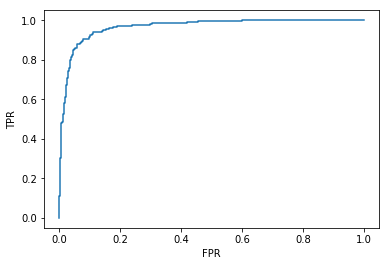

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

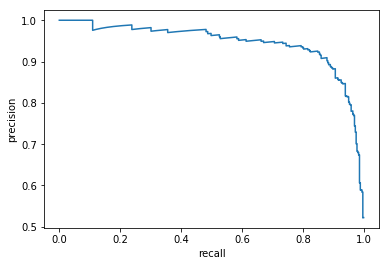

In [11]:
precision, recall, thresholds =metrics.precision_recall_curve(y_test, probs[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [12]:
print('AUC-ROC=',metrics.auc(fpr, tpr))
print('AUC-Precision/Recall=',metrics.auc(recall, precision))

AUC-ROC= 0.9661377747117373
AUC-Precision/Recall= 0.9455543041825126


### Среднее значение  AUC-ROC:

In [13]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=23)

quals = []
lr = LogisticRegression()
for tr_ind, test_ind in cv.split(X):
    lr.fit(X[tr_ind], y[tr_ind])
    quals.append(metrics.roc_auc_score(y[test_ind], lr.predict_proba(X[test_ind,:])[:,1]))
    
print ('Mean AUC-ROC =', np.mean(quals))
print ('AUC-ROC standart deviation =', np.std(quals))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

Mean AUC-ROC = 0.9696763911356067
AUC-ROC standart deviation = 0.003208261894926696


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Регуляризация в логистической регрессии
Сгенерируем двумерную искуственную выборку из 2 различных нормальных распределений. Будем использовать для этого [функцию](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.multivariate_normal.html).

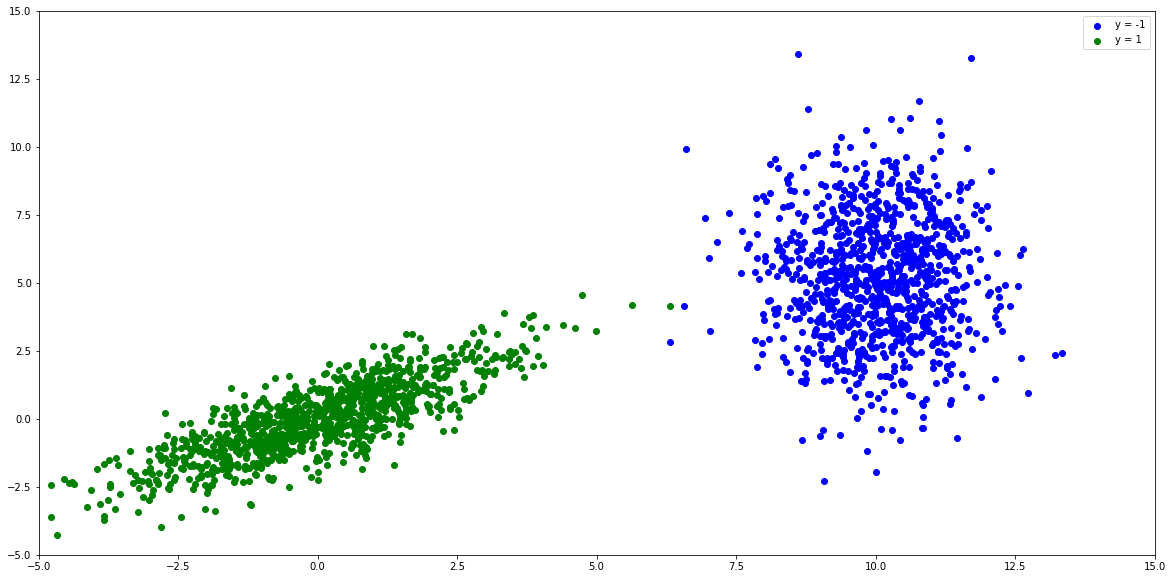

In [14]:
np.random.seed(17)
plt.figure(figsize=(20,10))
mean1 = [10, 5]
cov1 = [[1, 0], [0, 5]]  # diagonal covariance
data1 = np.random.multivariate_normal(mean1, cov1, 1000)
mean2 = [0, 0]
cov2 = [[3, 2], [2, 2]]
data2 = np.random.multivariate_normal(mean2, cov2, 1000)
X = np.vstack((data1, data2))
y = np.hstack((-np.ones(1000), np.ones(1000))) ### 


plt.scatter(data1[:, 0], data1[:, 1], c='blue')
plt.scatter(data2[:, 0], data2[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
plt.axis([-5,15,-5,15])
plt.show()

In [15]:
lr = LogisticRegression()
lr = lr.fit(X, y)

preds = lr.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, preds))

Accuracy = 0.999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


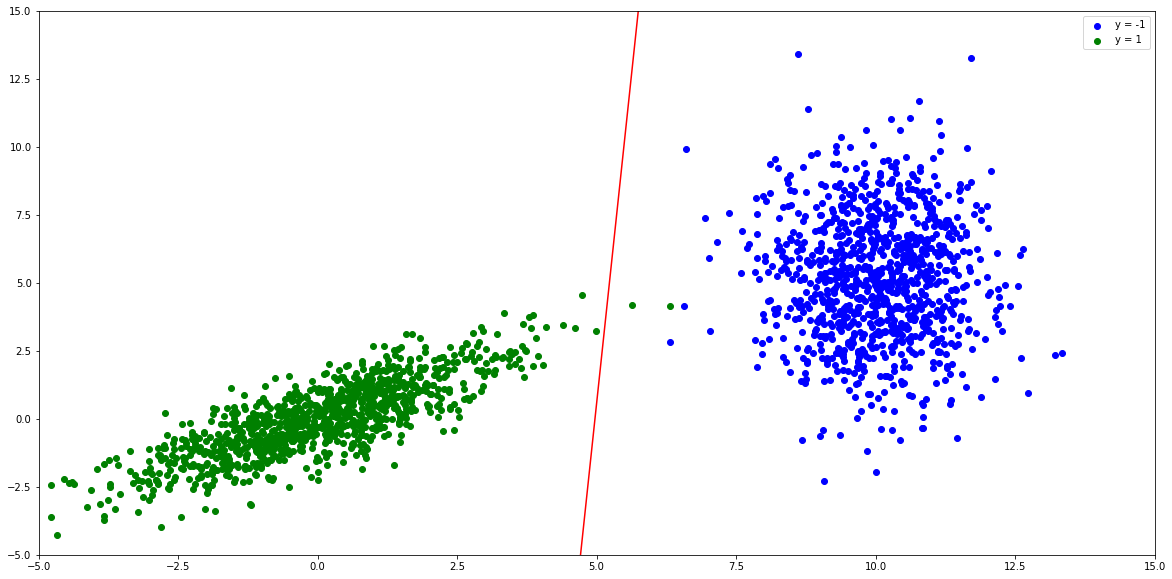

In [16]:
plt.figure(figsize=(20,10))

plx=np.linspace(0,10,1000)
ply=np.zeros(1000)
for i in range(len(plx)):
    ply[i]=-(lr.intercept_+lr.coef_[0,0]*plx[i])/ lr.coef_[0,1]
    
plt.scatter(data1[:, 0], data1[:, 1], c='blue')
plt.scatter(data2[:, 0], data2[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
plt.axis([-5,15,-5,15])

plt.plot(plx,ply, color='r')

plt.show()

In [17]:
print(lr.coef_)

[[-1.3269138   0.06861685]]


In [18]:
lr = LogisticRegression(C=0.1)
lr = lr.fit(X, y)

preds = lr.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, preds))

Accuracy = 0.9975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
print(lr.coef_)

[[-0.88611754  0.06151498]]


In [20]:
from sklearn.model_selection import GridSearchCV

alphas=np.logspace(-2,3,21)
param_grid = {'C': alphas}
cv = 3

optimizer = GridSearchCV(LogisticRegression(), param_grid, cv = cv)

optimizer.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-02, 1.77828e-02, 3.16228e-02, 5.62341e-02, 1.00000e-01,
       1.77828e-01, 3.16228e-01, 5.62341e-01, 1.00000e+00, 1.77828e+00,
       3.16228e+00, 5.62341e+00, 1.00000e+01, 1.77828e+01, 3.16228e+01,
       5.62341e+01, 1.00000e+02, 1.77828e+02, 3.16228e+02, 5.62341e+02,
       1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
score_mean=optimizer.cv_results_['mean_test_score']
score_std=optimizer.cv_results_['std_test_score']

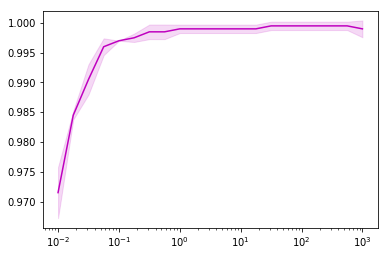

In [22]:
plt.fill_between(alphas, score_mean - score_std, score_mean + score_std, 
                 alpha = 0.15, color = 'm')
plt.semilogx(alphas, score_mean, color = 'm')

In [23]:
print(optimizer.best_params_)

{'C': 31.622776601683793}


In [24]:
lr = LogisticRegression(C=31)
lr = lr.fit(X, y)

preds = lr.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, preds))

Accuracy = 0.9995


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
